In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install tensorflow transformers

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling1D


In [ ]:
import pandas as pd


original_links = [
    'https://drive.google.com/file/d/1beAlBjHfokOzB9tnIKlVkUEctSITpdKK/view?usp=sharing',
    'https://drive.google.com/file/d/1ShRByTqej7xp2mKK7abMf9qUS7o5QJ00/view?usp=sharing',
    'https://drive.google.com/file/d/1SZ6cymgUmXgShUabD-lUqpDS5b7OUZ7r/view?usp=sharing',
    'https://drive.google.com/file/d/1zGGehW8xrfG_zbSWYf0aI5SCPu2hfyKo/view?usp=sharing',
    'https://drive.google.com/file/d/17hH1ifgory_tzy-ow9qcHNZCabJWuh0_/view?usp=sharing',
    'https://drive.google.com/file/d/1JMSlNqV37ZjQKVQHxUD5bWOWJHk24sLI/view?usp=sharing',
    'https://drive.google.com/file/d/1QdY1nS1-UsbZOQYBfThDDcvllzJqupCq/view?usp=sharing',
    'https://drive.google.com/file/d/1909FMV6x-oYqL4hIxypRRVab7cUZz1Vj/view?usp=sharing'
]


direct_links = ['https://drive.google.com/uc?id=' + link.split('/d/')[1].split('/view')[0] for link in original_links]

def load_dataset_from_link(link):

    return pd.read_csv(link, encoding='ISO-8859-1')


datasets = [load_dataset_from_link(link) for link in direct_links]


for i, dataset in enumerate(datasets):
    print(f"Dataset {i+1}:")
    print(dataset.head(), "\n")


Dataset 1:
   index                                               Text  ed_label_0  \
0      0  `- This is not ``creative``.  Those are the di...    0.900000   
1      1  `  :: the term ``standard model`` is itself le...    1.000000   
2      2    True or false, the situation as of March 200...    1.000000   
3      3   Next, maybe you could work on being less cond...    0.555556   
4      4               This page will need disambiguation.     1.000000   

   ed_label_1  oh_label  
0    0.100000         0  
1    0.000000         0  
2    0.000000         0  
3    0.444444         0  
4    0.000000         0   

Dataset 2:
   index                                               Text  ed_label_0  \
0      0  `- This is not ``creative``.  Those are the di...    1.000000   
1      1  `  :: the term ``standard model`` is itself le...    1.000000   
2      2    True or false, the situation as of March 200...    1.000000   
3      3   Next, maybe you could work on being less cond...    0.5555

In [ ]:
import pandas as pd

# Replace 'direct_link' with your actual file link
direct_link = 'https://drive.google.com/uc?id=1beAlBjHfokOzB9tnIKlVkUEctSITpdKK'

# Attempt to load the first 5 rows to inspect the file
try:
    data_sample = pd.read_csv(direct_link, encoding='ISO-8859-1', nrows=5)
    print(data_sample.head())
except Exception as e:
    print("Error loading the data:", e)


   index                                               Text  ed_label_0  \
0      0  `- This is not ``creative``.  Those are the di...    0.900000   
1      1  `  :: the term ``standard model`` is itself le...    1.000000   
2      2    True or false, the situation as of March 200...    1.000000   
3      3   Next, maybe you could work on being less cond...    0.555556   
4      4               This page will need disambiguation.     1.000000   

   ed_label_1  oh_label  
0    0.100000         0  
1    0.000000         0  
2    0.000000         0  
3    0.444444         0  
4    0.000000         0  


In [ ]:
import pandas as pd
import re


direct_links = [
    'https://drive.google.com/uc?id=1beAlBjHfokOzB9tnIKlVkUEctSITpdKK',
    'https://drive.google.com/uc?id=1ShRByTqej7xp2mKK7abMf9qUS7o5QJ00',
    'https://drive.google.com/uc?id=1SZ6cymgUmXgShUabD-lUqpDS5b7OUZ7r',
    'https://drive.google.com/uc?id=1zGGehW8xrfG_zbSWYf0aI5SCPu2hfyKo',
    'https://drive.google.com/uc?id=17hH1ifgory_tzy-ow9qcHNZCabJWuh0_',
    'https://drive.google.com/uc?id=1JMSlNqV37ZjQKVQHxUD5bWOWJHk24sLI',
    'https://drive.google.com/uc?id=1QdY1nS1-UsbZOQYBfThDDcvllzJqupCq',
    'https://drive.google.com/uc?id=1909FMV6x-oYqL4hIxypRRVab7cUZz1Vj'
]


def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text



def load_dataset_from_link(link):
    return pd.read_csv(link, encoding='ISO-8859-1')


preprocessed_datasets = []


for link in direct_links:
    data = load_dataset_from_link(link)
    if 'Text' in data.columns:
        data['Text'] = data['Text'].apply(clean_text)
    preprocessed_datasets.append(data)


for i, dataset in enumerate(preprocessed_datasets):
    print(f"Dataset {i+1}:")
    print(dataset.head(), "\n")



Dataset 1:
   index                                               Text  ed_label_0  \
0      0   this is not creative those are the dictionary...    0.900000   
1      1   the term standard model is itself less npov t...    1.000000   
2      2   true or false the situation as of march 2002 ...    1.000000   
3      3   next maybe you could work on being less conde...    0.555556   
4      4                this page will need disambiguation     1.000000   

   ed_label_1  oh_label  
0    0.100000         0  
1    0.000000         0  
2    0.000000         0  
3    0.444444         0  
4    0.000000         0   

Dataset 2:
   index                                               Text  ed_label_0  \
0      0   this is not creative those are the dictionary...    1.000000   
1      1   the term standard model is itself less npov t...    1.000000   
2      2   true or false the situation as of march 2002 ...    1.000000   
3      3   next maybe you could work on being less conde...    0.5555

EDA for Dataset 1:


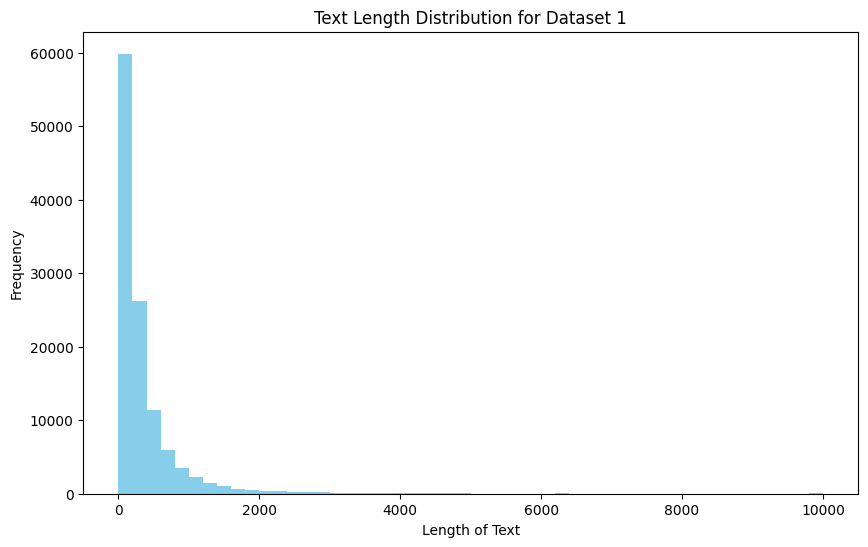

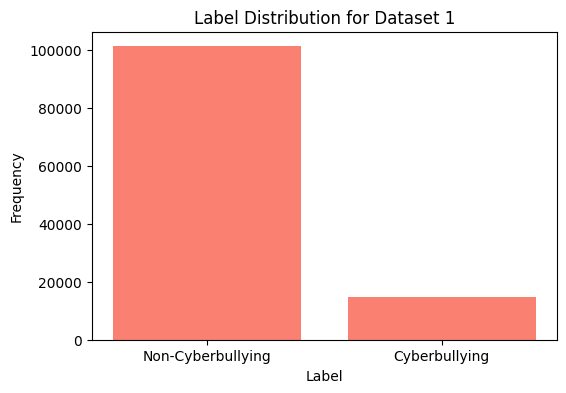

EDA for Dataset 2:


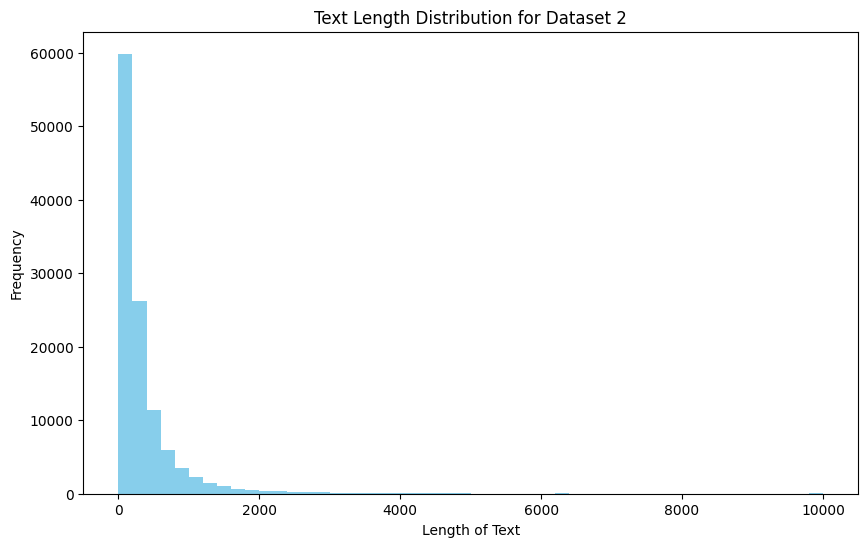

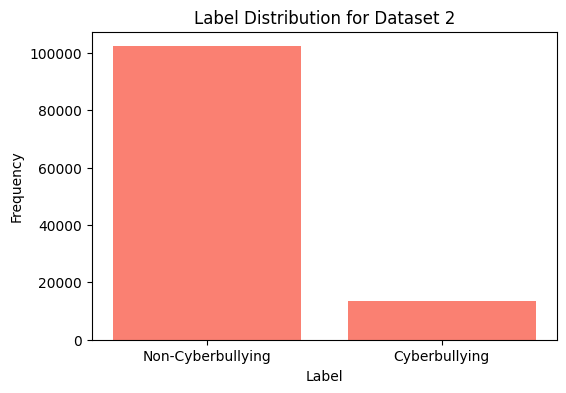

EDA for Dataset 3:


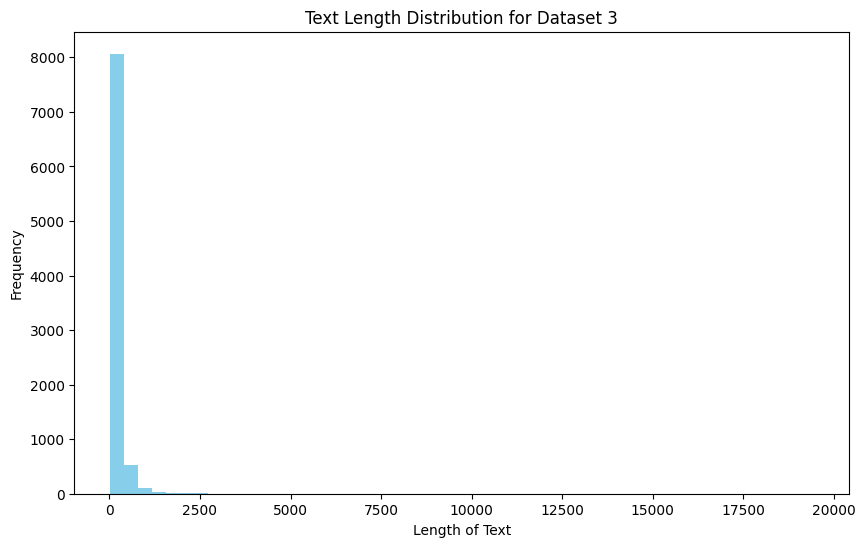

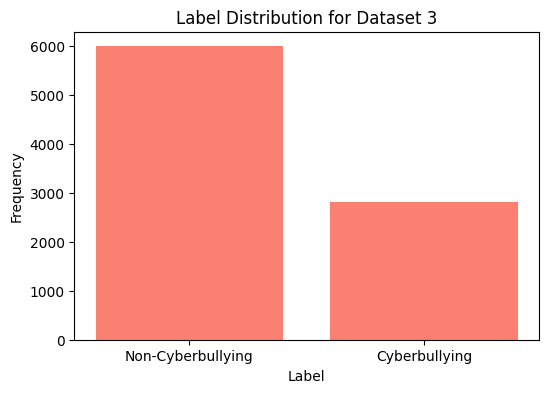

EDA for Dataset 4:


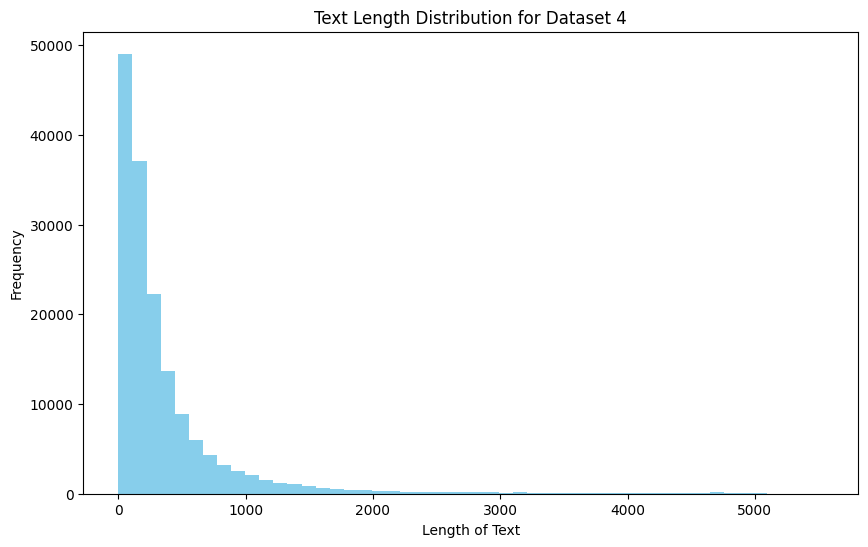

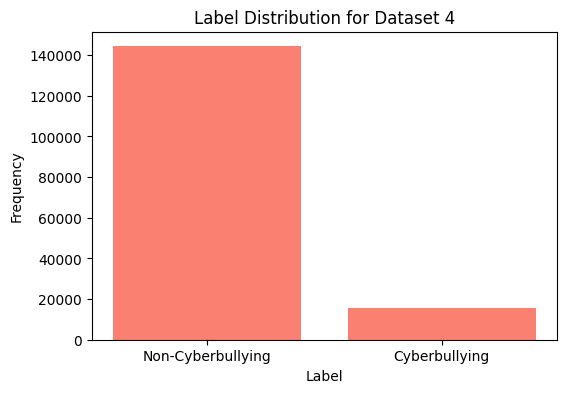

EDA for Dataset 5:


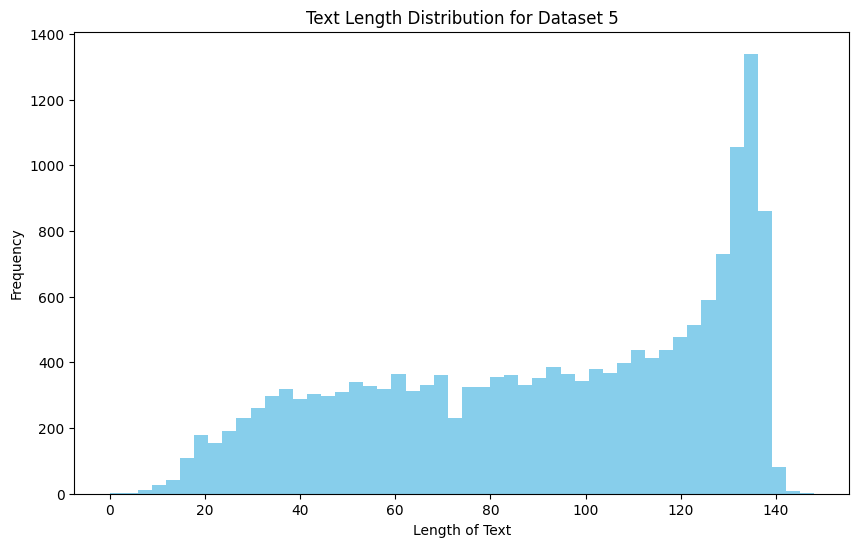

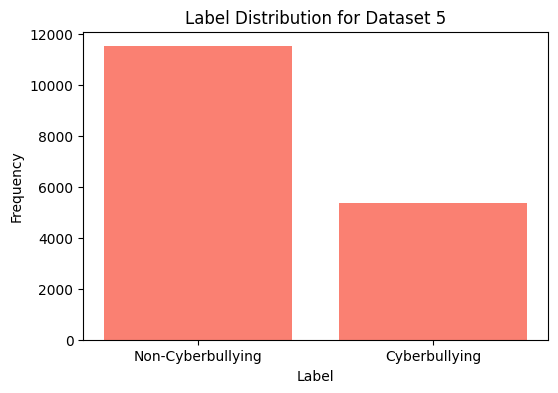

EDA for Dataset 6:


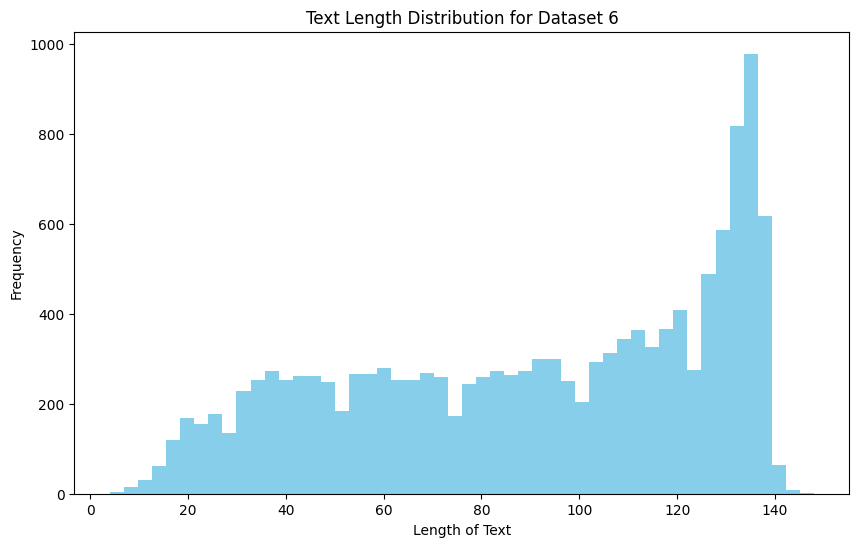

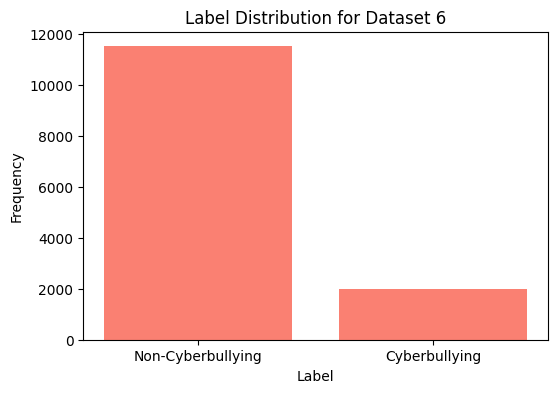

EDA for Dataset 7:


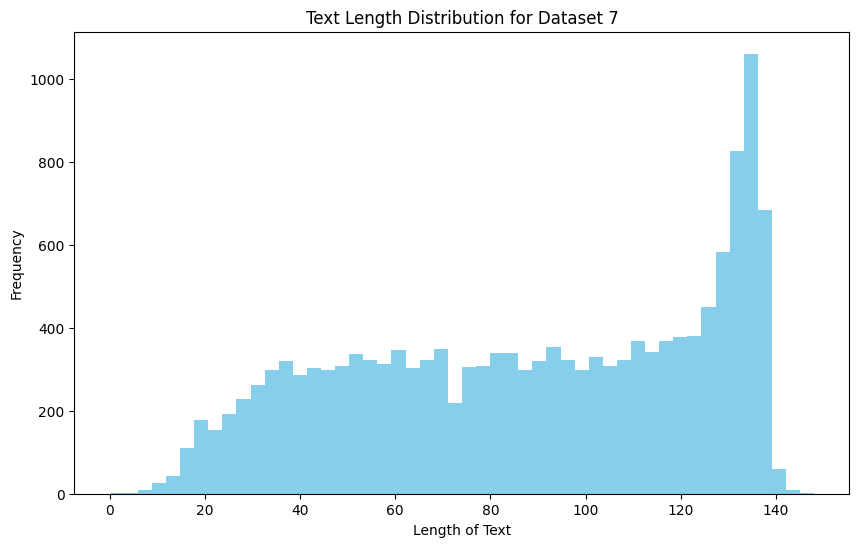

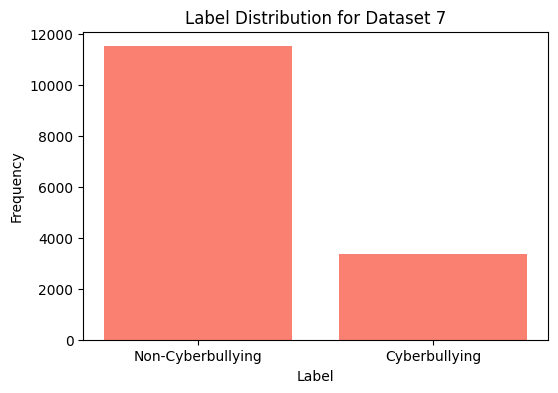

EDA for Dataset 8:


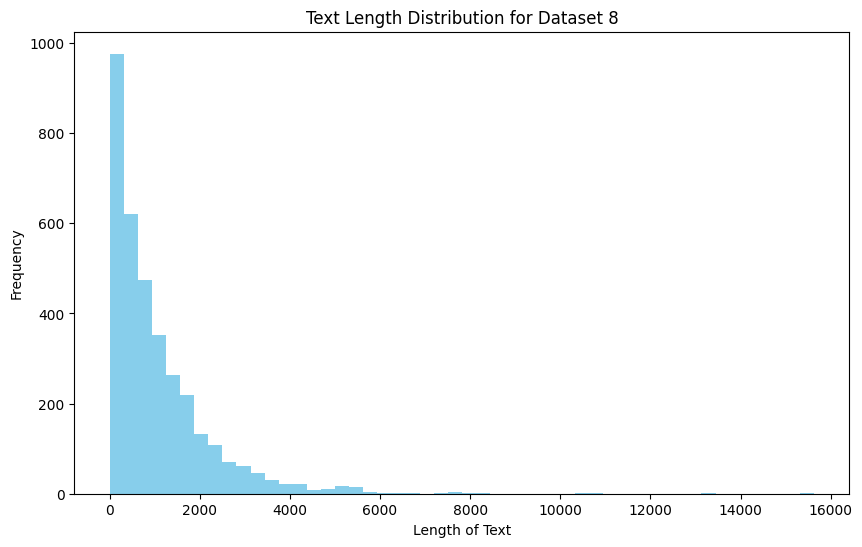

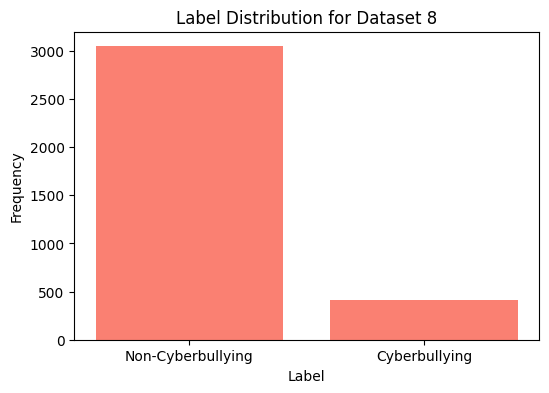

In [ ]:
import matplotlib.pyplot as plt


for i, dataset in enumerate(preprocessed_datasets):
    print(f"EDA for Dataset {i+1}:")

    if 'Text' in dataset.columns:

        dataset['Text_length'] = dataset['Text'].apply(len)
        plt.figure(figsize=(10, 6))
        plt.hist(dataset['Text_length'], bins=50, color='skyblue')
        plt.title(f'Text Length Distribution for Dataset {i+1}')
        plt.xlabel('Length of Text')
        plt.ylabel('Frequency')
        plt.show()
    else:
        print(f"'Text' column not found in Dataset {i+1} for text length analysis.")


    if 'oh_label' in dataset.columns:

        label_counts = dataset['oh_label'].value_counts()
        plt.figure(figsize=(6, 4))
        plt.bar(label_counts.index.astype(str), label_counts.values, color='salmon')
        plt.title(f'Label Distribution for Dataset {i+1}')
        plt.xlabel('Label')
        plt.ylabel('Frequency')
        plt.xticks([0, 1], ['Non-Cyberbullying', 'Cyberbullying'])
        plt.show()
    else:
        print(f"'oh_label' column not found in Dataset {i+1} for label distribution analysis.")


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

def process_dataset(dataset):

    if 'Text' in dataset.columns and 'oh_label' in dataset.columns:

        dataset = dataset.dropna(subset=['oh_label'])


        tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
        X = tfidf_vectorizer.fit_transform(dataset['Text'])
        y = dataset['oh_label']


        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


        model = LogisticRegression(max_iter=1000, class_weight='balanced')
        model.fit(X_train, y_train)


        y_pred = model.predict(X_test)
        print(classification_report(y_test, y_pred))
        print(f"Accuracy: {accuracy_score(y_test, y_pred)}\n")
    else:
        print("Required columns 'Text' or 'oh_label' not found in the dataset.")



for i, dataset in enumerate(preprocessed_datasets):
    print(f"Processing Dataset {i+1}")
    process_dataset(dataset)


Processing Dataset 1
              precision    recall  f1-score   support

           0       0.98      0.92      0.94     20228
           1       0.59      0.84      0.69      2945

    accuracy                           0.91     23173
   macro avg       0.78      0.88      0.82     23173
weighted avg       0.93      0.91      0.91     23173

Accuracy: 0.9059681525913779

Processing Dataset 2
              precision    recall  f1-score   support

           0       0.98      0.93      0.95     20465
           1       0.60      0.85      0.70      2708

    accuracy                           0.92     23173
   macro avg       0.79      0.89      0.83     23173
weighted avg       0.93      0.92      0.92     23173

Accuracy: 0.916756570146291

Processing Dataset 3
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1178
           1       0.69      0.70      0.70       582

    accuracy                           0.80      1760
   mac

In [ ]:
from imblearn.over_sampling import SMOTE

def balance_dataset(X, y):
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)
    return X_resampled, y_resampled


In [ ]:
!unzip /content/glove.6B.100d.txt.zip -d /content/glove



unzip:  cannot find or open /content/glove.6B.100d.txt.zip, /content/glove.6B.100d.txt.zip.zip or /content/glove.6B.100d.txt.zip.ZIP.


In [ ]:
glove_embeddings = load_glove_embeddings('/content/glove/glove.6B.100d.txt')


NameError: name 'load_glove_embeddings' is not defined

In [ ]:
import numpy as np

def load_glove_embeddings(path):
    embeddings = {}
    with open(path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings


glove_embeddings = load_glove_embeddings('/content/glove/glove.6B.100d.txt')


FileNotFoundError: [Errno 2] No such file or directory: '/content/glove/glove.6B.100d.txt'

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

def train_models(X_train, y_train):
    models = {
        "LogisticRegression": LogisticRegression(max_iter=1000),
        "RandomForest": RandomForestClassifier(n_estimators=100)
    }

    for name, model in models.items():
        model.fit(X_train, y_train)
        models[name] = model

    return models


In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV

def evaluate_models(models, X, y):
    for name, model in models.items():
        scores = cross_val_score(model, X, y, cv=5)
        print(f"{name} - Accuracy: {np.mean(scores)}")

def tune_hyperparameters(model, param_grid, X, y):
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X, y)
    return grid_search.best_estimator_


In [ ]:
from sklearn.metrics import classification_report
from sklearn.ensemble import VotingClassifier

def error_analysis(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

def ensemble_models(models):
    ensemble = VotingClassifier(estimators=[(name, model) for name, model in models.items()], voting='soft')
    return ensemble


In [ ]:
pip install imbalanced-learn


In [ ]:
from imblearn.over_sampling import SMOTE

def balance_dataset(X, y):
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)
    return X_resampled, y_resampled


In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import classification_report


def balance_dataset(X, y):
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)
    return X_resampled, y_resampled


def train_models(X_train, y_train):
    models = {
        "LogisticRegression": LogisticRegression(max_iter=1000),
        "RandomForest": RandomForestClassifier(n_estimators=100)
    }

    for name, model in models.items():
        model.fit(X_train, y_train)
        models[name] = model

    return models


def evaluate_models(models, X, y):
    for name, model in models.items():
        print(f"{name} - Accuracy:")
        print(classification_report(y, model.predict(X)))


def ensemble_models(models):
    ensemble = VotingClassifier(estimators=[(name, model) for name, model in models.items()], voting='soft')
    ensemble.fit(X_resampled, y_resampled)
    return ensemble


for i, dataset in enumerate(preprocessed_datasets):
    print(f"Processing Dataset {i+1}")


    dataset = dataset.dropna(subset=['oh_label'])


    vectorizer = TfidfVectorizer(max_features=1000)
    X_vectorized = vectorizer.fit_transform(dataset['Text'].values.astype('U'))  # Convert text to Unicode
    y = dataset['oh_label']


    X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)


    X_resampled, y_resampled = balance_dataset(X_train, y_train)


    models = train_models(X_resampled, y_resampled)


    evaluate_models(models, X_test, y_test)


    ensemble = ensemble_models(models)
    print("Ensemble Model - Accuracy:")
    print(classification_report(y_test, ensemble.predict(X_test)))



Processing Dataset 1
LogisticRegression - Accuracy:
              precision    recall  f1-score   support

           0       0.97      0.87      0.92     20228
           1       0.48      0.81      0.60      2945

    accuracy                           0.86     23173
   macro avg       0.72      0.84      0.76     23173
weighted avg       0.91      0.86      0.88     23173

RandomForest - Accuracy:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     20228
           1       0.73      0.55      0.63      2945

    accuracy                           0.92     23173
   macro avg       0.84      0.76      0.79     23173
weighted avg       0.91      0.92      0.91     23173

Ensemble Model - Accuracy:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     20228
           1       0.63      0.74      0.68      2945

    accuracy                           0.91     23173
   macro avg       0.79 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


data = {
    'Text': ["This is a sample text", "Another sample text for testing", "Text data for training", "Cyberbullying example text", "Yet another text"],
    'Label': [0, 1, 0, 1, 0]
}

df = pd.DataFrame(data)


texts = df['Text'].values
labels = df['Label'].values


label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)


tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(texts)
word_index = tokenizer.word_index


sequences = tokenizer.texts_to_sequences(texts)


maxlen = 10


data = pad_sequences(sequences, maxlen=maxlen)


X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout


cnn_model = Sequential()
cnn_model.add(Embedding(input_dim=len(word_index) + 1, output_dim=128, input_length=maxlen))
cnn_model.add(Conv1D(128, 5, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=5))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(1, activation='sigmoid'))

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


cnn_history = cnn_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))


cnn_score = cnn_model.evaluate(X_test, y_test, verbose=0)
print(f'CNN Test Loss: {cnn_score[0]}, CNN Test Accuracy: {cnn_score[1]}')


y_pred_cnn = (cnn_model.predict(X_test) > 0.5).astype("int32")


from sklearn.metrics import classification_report
print("CNN Classification Report")
print(classification_report(y_test, y_pred_cnn))
